# Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Training Data

In [2]:
df_train = pd.read_csv("../files/data/SINGLE_CRACK/CORNER_CRACK_STRAIGHT_HOLE/CORNER_CRACK_BH_QUARTER_ELLIPSE_TRAIN.csv")
df_train

,c_index,W/R,a/c,a/t,r/t,b/t,phi,K-T,K-B,K-P
0,1.0,2.400,0.1,0.1,1.25,1.0,0.057972,0.945518,1.032792,0.884271
1,1.0,2.400,0.1,0.1,1.25,1.0,0.069428,0.962271,1.050250,0.900114
2,1.0,2.400,0.1,0.1,1.25,1.0,0.080884,0.982516,1.070450,0.919154
3,1.0,2.400,0.1,0.1,1.25,1.0,0.092340,1.005413,1.093304,0.940636
4,1.0,2.400,0.1,0.1,1.25,1.0,0.103796,1.030196,1.118613,0.963867
...,...,...,...,...,...,...,...,...,...,...
2762875,28779.0,133.333,10.0,0.9,0.75,1.0,1.467062,2.447173,-1.292280,81.790659
2762876,28779.0,133.333,10.0,0.9,0.75,1.0,1.478518,2.394714,-1.267521,80.059584
2762877,28779.0,133.333,10.0,0.9,0.75,1.0,1.489974,2.346531,-1.244384,78.469975
2762878,28779.0,133.333,10.0,0.9,0.75,1.0,1.501431,2.303618,-1.223361,77.055841


In [3]:
# Get unique combinations of the first four columns
train_combinations = df_train.iloc[:, 1:5].drop_duplicates().to_numpy()

print(len(train_combinations))

21585


In [4]:
print("Different W/R values: ", np.unique(train_combinations[:,0], axis=0))
print("Different a/c values: ", np.unique(train_combinations[:,1], axis=0))
print("Different a/t values: ", np.unique(train_combinations[:,2], axis=0))
print("Different r/t values: ", np.unique(train_combinations[:,3], axis=0))
print("Different phi values: ", np.unique(df_train.iloc[:,6], axis=0))

Different W/R values:  [   1.6      1.8      2.       2.2      2.4      2.8      3.2      3.6
    4.       4.6      5.2      5.8      6.4      7.       8.      10.
   12.      12.5     15.      20.      25.      33.333   40.      50.
   57.143   66.7     75.019   80.     100.     125.     133.333  149.9
  175.     175.009  200.     300.3    500.     700.28   800.     900.901
 1000.   ]
Different a/c values:  [ 0.1     0.111   0.125   0.1428  0.1667  0.2     0.25    0.333   0.5
  0.667   0.75    0.8     1.      1.25    1.333   1.5     2.      3.
  4.      5.      6.      7.      8.      9.     10.    ]
Different a/t values:  [0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  0.95]
Different r/t values:  [ 0.1     0.111   0.125   0.1428  0.2     0.333   0.5     0.5714  0.667
  0.75    0.8     1.      1.25    1.333   1.5     1.75    2.      2.5
  3.      4.      5.      8.     10.    ]
Different phi values:  [0.05792191 0.05792206 0.05792221 ... 1.51288763 1.51288779 1.51288794]


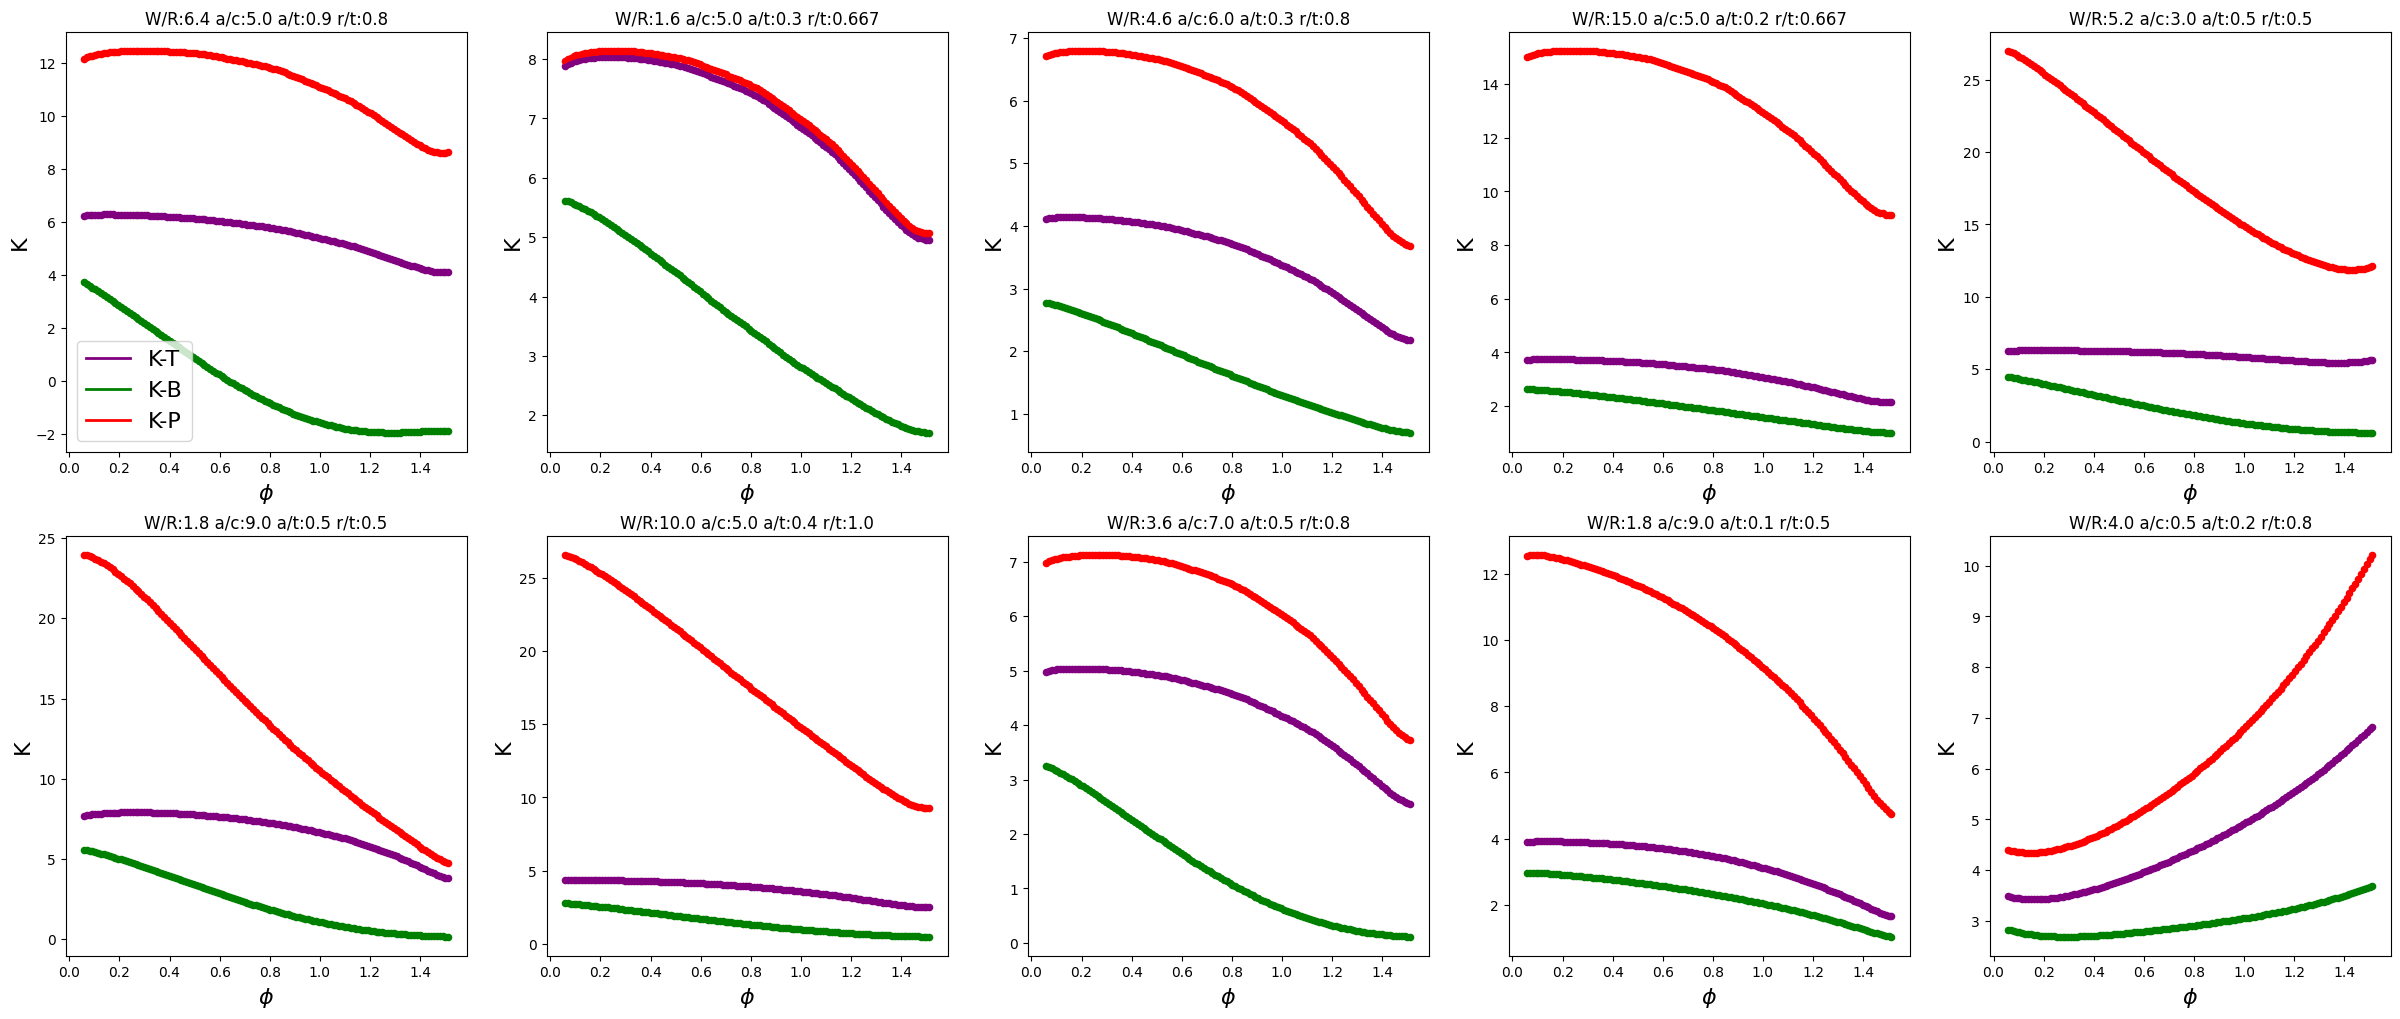

In [7]:
d = df_train.to_numpy()

num_crack = np.unique(d[:,0])

np.random.seed(10)
fig, axs = plt.subplots(2, 5, figsize=(30,12))
for i in range(2):
    for j in range(5):
        idx = np.random.randint(0, len(num_crack))
        data = d[idx*128:idx*128+128]
        W_R = np.unique(data[:,1])
        a_c = np.unique(data[:,2])
        a_t = np.unique(data[:,3])
        r_t = np.unique(data[:,4])

        assert len(W_R) == 1
        assert len(a_c) == 1
        assert len(a_t) == 1
        assert len(r_t) == 1

        axs[i,j].plot(data[:,-4], data[:,-3], label="K-T", color='purple', linestyle="-", linewidth=2)
        axs[i,j].scatter(data[:,-4], data[:,-3], color='purple', s=20)

        axs[i,j].plot(data[:,-4], data[:,-2], label="K-B", color='green', linestyle="-", linewidth=2)
        axs[i,j].scatter(data[:,-4], data[:,-2], color='green', s=20)

        axs[i,j].plot(data[:,-4], data[:,-1], label="K-P", color='red', linestyle="-", linewidth=2)
        axs[i,j].scatter(data[:,-4], data[:,-1], color='red', s=20)

        axs[i,j].set_title("W/R:{} a/c:{} a/t:{} r/t:{}".format(W_R[0], a_c[0], a_t[0], r_t[0]))
        axs[i,j].set_ylabel("K", fontsize=16)
        axs[i,j].set_xlabel(r"$\phi$", fontsize=16)
        
        if i == 0 and j == 0:
            axs[i,j].legend(fontsize=16)

plt.show()

# Testing Data

In [9]:
df_test = pd.read_csv("../files/data/SINGLE_CRACK/CORNER_CRACK_STRAIGHT_HOLE/CORNER_CRACK_BH_QUARTER_ELLIPSE_TEST.csv")
df_test

,c_index,W/R,a/c,a/t,r/t,b/t,phi,K-T,K-B,K-P
0,0.0,2.200,0.1,0.10,1.25,1.0,0.057972,0.931029,1.096668,0.858805
1,0.0,2.200,0.1,0.10,1.25,1.0,0.069428,0.947679,1.114230,0.874324
2,0.0,2.200,0.1,0.10,1.25,1.0,0.080884,0.967757,1.135983,0.892977
3,0.0,2.200,0.1,0.10,1.25,1.0,0.092340,0.990546,1.160526,0.913913
4,0.0,2.200,0.1,0.10,1.25,1.0,0.103796,1.014772,1.187478,0.936605
...,...,...,...,...,...,...,...,...,...,...
921083,28780.0,133.333,10.0,0.95,0.75,1.0,1.467062,2.522433,-1.497326,83.527692
921084,28780.0,133.333,10.0,0.95,0.75,1.0,1.478518,2.469612,-1.468863,81.792988
921085,28780.0,133.333,10.0,0.95,0.75,1.0,1.489974,2.421220,-1.442476,80.196547
921086,28780.0,133.333,10.0,0.95,0.75,1.0,1.501431,2.377552,-1.418226,78.782289


In [10]:
# Get unique combinations of the first four columns
test_combinations = df_test.iloc[:, 1:5].drop_duplicates().to_numpy()

print(len(test_combinations))

7196


In [11]:
print("Different W/R values: ", np.unique(test_combinations[:,0], axis=0))
print("Different a/c values: ", np.unique(test_combinations[:,1], axis=0))
print("Different a/t values: ", np.unique(test_combinations[:,2], axis=0))
print("Different r/t values: ", np.unique(test_combinations[:,3], axis=0))
print("Different phi values: ", np.unique(df_test.iloc[:,6], axis=0))

Different W/R values:  [   1.6      1.8      2.       2.2      2.4      2.8      3.2      3.6
    4.       4.6      5.2      5.8      6.4      7.       8.      10.
   12.      12.5     15.      20.      25.      33.333   40.      50.
   57.143   66.7     75.019   80.     100.     125.     133.333  149.9
  175.     175.009  200.     300.3    500.     700.28   800.     900.901
 1000.   ]
Different a/c values:  [ 0.1     0.111   0.125   0.1428  0.1667  0.2     0.25    0.333   0.5
  0.667   0.75    0.8     1.      1.25    1.333   1.5     2.      3.
  4.      5.      6.      7.      8.      9.     10.    ]
Different a/t values:  [0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  0.95]
Different r/t values:  [ 0.1     0.111   0.125   0.1428  0.2     0.333   0.5     0.5714  0.667
  0.75    0.8     1.      1.25    1.333   1.5     1.75    2.      2.5
  3.      4.      5.      8.     10.    ]
Different phi values:  [0.05792191 0.05792206 0.05792221 ... 1.51288763 1.51288779 1.51288794]


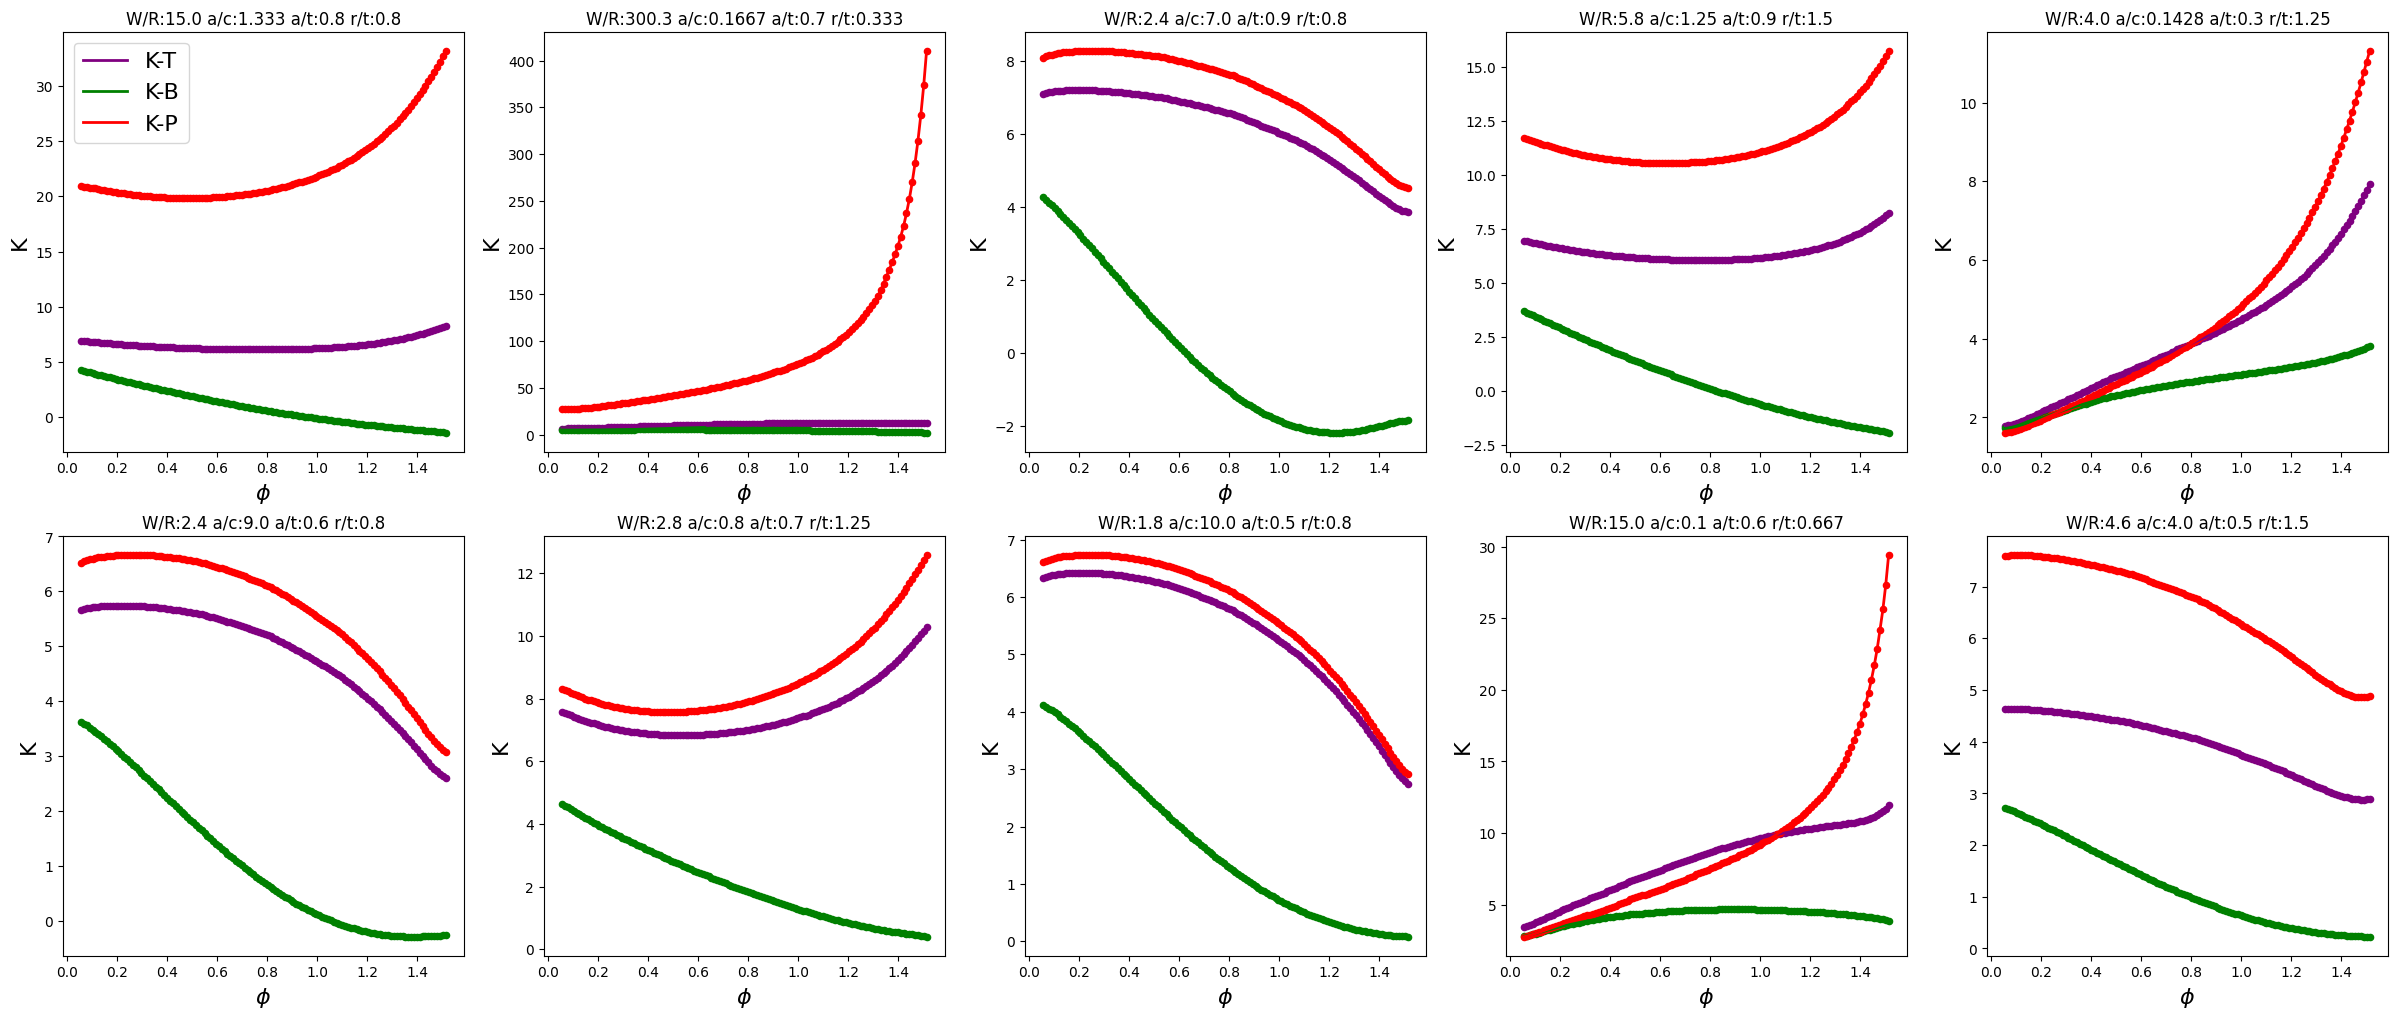

In [18]:
d = df_test.to_numpy()

num_crack = np.unique(d[:,0])

np.random.seed(100)
fig, axs = plt.subplots(2, 5, figsize=(30,12))
for i in range(2):
    for j in range(5):
        idx = np.random.randint(0, len(num_crack))
        data = d[idx*128:idx*128+128]
        W_R = np.unique(data[:,1])
        a_c = np.unique(data[:,2])
        a_t = np.unique(data[:,3])
        r_t = np.unique(data[:,4])

        assert len(W_R) == 1
        assert len(a_c) == 1
        assert len(a_t) == 1
        assert len(r_t) == 1

        axs[i,j].plot(data[:,-4], data[:,-3], label="K-T", color='purple', linestyle="-", linewidth=2)
        axs[i,j].scatter(data[:,-4], data[:,-3], color='purple', s=20)

        axs[i,j].plot(data[:,-4], data[:,-2], label="K-B", color='green', linestyle="-", linewidth=2)
        axs[i,j].scatter(data[:,-4], data[:,-2], color='green', s=20)

        axs[i,j].plot(data[:,-4], data[:,-1], label="K-P", color='red', linestyle="-", linewidth=2)
        axs[i,j].scatter(data[:,-4], data[:,-1], color='red', s=20)

        axs[i,j].set_title("W/R:{} a/c:{} a/t:{} r/t:{}".format(W_R[0], a_c[0], a_t[0], r_t[0]))
        axs[i,j].set_ylabel("K", fontsize=16)
        axs[i,j].set_xlabel(r"$\phi$", fontsize=16)
        
        if i == 0 and j == 0:
            axs[i,j].legend(fontsize=16)

plt.show()